In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from txai.smoother import smoother
from txai.utils.predictors.loss import Poly1CrossEntropyLoss, L1Loss_permask, PairwiseDecorrelation
from txai.trainers.train_cbmv1 import train_cbmv1
from txai.models.encoders.transformer_simple import TransformerMVTS
from txai.models.cbmv1 import CBMv1
from txai.utils.data import process_Synth
from txai.utils.predictors.eval import eval_cbmv1
from txai.synth_data.simple_spike import SpikeTrainDataset

In [3]:
D = process_Synth(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/SeqCombSingle')
train_loader = torch.utils.data.DataLoader(D['train_loader'], batch_size = 64, shuffle = True)

val, test = D['val'], D['test']

model = TransformerMVTS(
    d_inp = val[0].shape[-1],
    max_len = val[0].shape[0],
    n_classes = 4,
    trans_dim_feedforward = 16,
    trans_dropout = 0.1,
    d_pe = 16,
)
model.load_state_dict(torch.load('../seqcombsingle/models/Scomb_transformer_split={}_cpu.pt'.format(1), map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
samp = np.random.choice(np.arange(test[0].shape[1]))

sampX, samptime, sampy = test[0][:,samp,:], test[1][:,samp], test[2][samp]
sampX, samptime, sampy = sampX.unsqueeze(1), samptime.unsqueeze(1), sampy.unsqueeze(0)

In [6]:
def show_ts(X):
    plt.plot(X.squeeze())
    plt.show()

In [10]:
ft = torch.fft.rfft(sampX.squeeze())
print(ft.shape)

Xrev = torch.fft.irfft(ft[:5], n = 50)
print(Xrev.shape)

torch.Size([26])
torch.Size([50])


In [22]:
print(ft)

tensor([13.3573+0.0000j, -0.4692-0.0750j, -1.3086-0.2765j, -0.4743-1.1617j,
        -0.6307+0.9303j,  0.3537+0.1749j, -0.6600-0.2129j,  0.2910-0.1267j,
        -0.0280-0.0877j,  0.3001+0.4575j, -0.1298+0.0301j, -0.3200-0.0588j,
         0.1238-0.2246j, -0.2014+0.1499j,  0.1144+0.1647j, -0.2748-0.2017j,
         0.1079+0.0600j, -0.4251-0.2066j, -0.2196+0.1725j,  0.1272-0.2466j,
        -0.1512-0.3178j,  0.2848-0.3391j, -0.7823-0.1561j, -0.1358+1.0266j,
         0.2472+0.2012j, -0.2110+0.0000j])


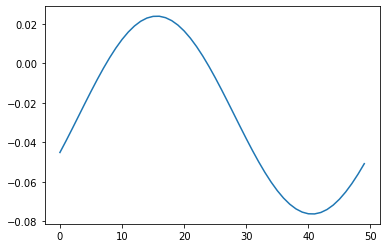

In [21]:
show_ts(torch.fft.irfft(ft[2:4], n = 50))

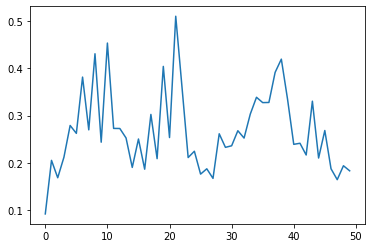

In [13]:
show_ts(sampX.squeeze())